Directory 'Crypto_Stock_Analysis_Results' already exists. Saving files there.

Visualization saved to: Crypto_Stock_Analysis_Results\Full_Time_Series_Analysis.png


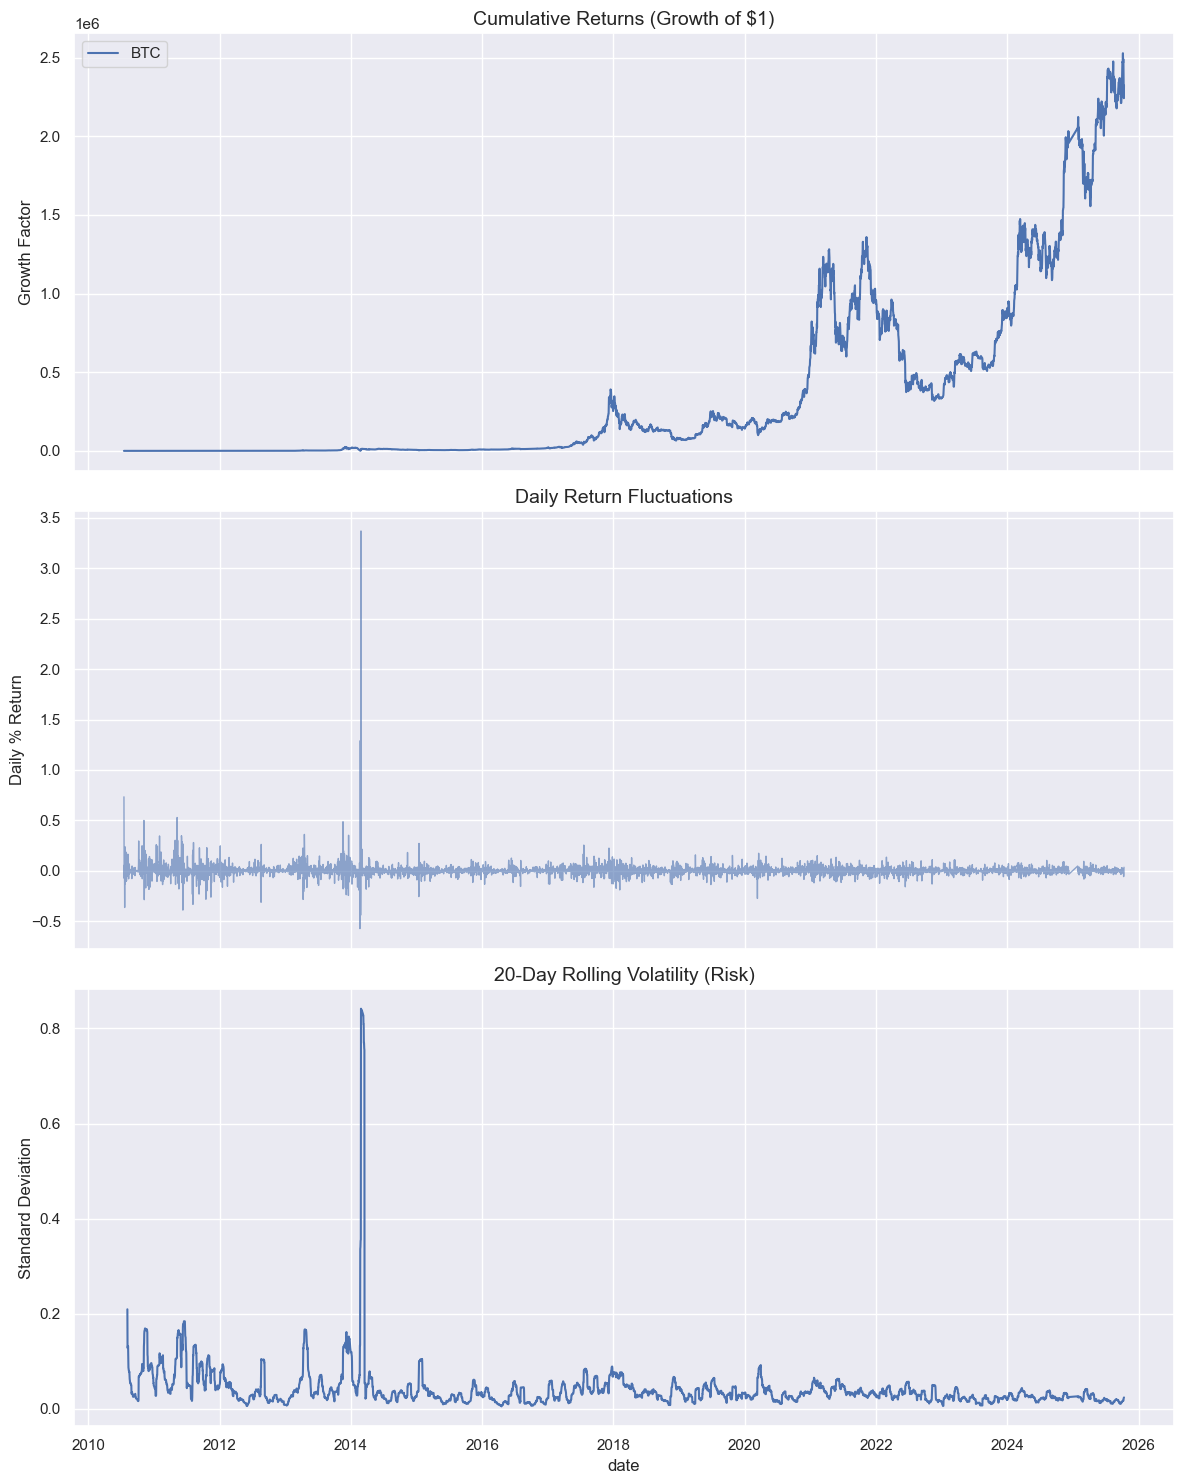


Exporting individual ticker files to 'Crypto_Stock_Analysis_Results/'...
  -> Saved: BTC_analysis.csv
  -> Saved Master Correlation file: MASTER_Returns_For_Correlation.csv


In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np

# 1. CONFIGURATION & FOLDER SETUP
# ==========================================
input_file = r"C:\Users\dgara\Documents\Universidad\Florida Tech\Work\Bisk College of Business\Crypto data\BTC.csv"   # REPLACE with your actual filename
output_folder = 'Crypto_Stock_Analysis_Results'

# Create the folder if it doesn't exist
if not os.path.exists(output_folder):
    os.makedirs(output_folder)
    print(f"Created directory: {output_folder}")
else:
    print(f"Directory '{output_folder}' already exists. Saving files there.")

# 2. LOAD & PROCESS DATA
# ==========================================
df = pd.read_csv(input_file)

# Convert date to datetime and sort
df['date'] = pd.to_datetime(df['date'])
df = df.sort_values(['ticker', 'date'])

# --- Feature Engineering ---
# A. Daily Returns
df['daily_return'] = df.groupby('ticker')['close'].pct_change()

# B. Cumulative Returns (Growth of $1)
df['cumulative_return'] = df.groupby('ticker')['daily_return'].transform(
    lambda x: (1 + x).cumprod()
)

# C. Rolling Volatility (20-day window)
df['volatility_20d'] = df.groupby('ticker')['daily_return'].transform(
    lambda x: x.rolling(window=20).std()
)

# 3. VISUALIZATION (Restored Full Analysis)
# ==========================================
sns.set_theme(style="darkgrid")

# Create 3 subplots stacked vertically
fig, axes = plt.subplots(3, 1, figsize=(12, 15), sharex=True)

# Plot 1: Cumulative Growth
sns.lineplot(data=df, x='date', y='cumulative_return', hue='ticker', ax=axes[0])
axes[0].set_title('Cumulative Returns (Growth of $1)', fontsize=14)
axes[0].set_ylabel('Growth Factor')
axes[0].legend(loc='upper left')

# Plot 2: Daily Returns (Noise)
sns.lineplot(data=df, x='date', y='daily_return', hue='ticker', alpha=0.6, linewidth=1, ax=axes[1])
axes[1].set_title('Daily Return Fluctuations', fontsize=14)
axes[1].set_ylabel('Daily % Return')
axes[1].get_legend().remove() # Remove legend here to reduce clutter

# Plot 3: Volatility (Risk)
sns.lineplot(data=df, x='date', y='volatility_20d', hue='ticker', ax=axes[2])
axes[2].set_title('20-Day Rolling Volatility (Risk)', fontsize=14)
axes[2].set_ylabel('Standard Deviation')
axes[2].get_legend().remove()

plt.tight_layout()

# Save the full visual analysis to the folder
plot_filename = os.path.join(output_folder, "Full_Time_Series_Analysis.png")
plt.savefig(plot_filename)
print(f"\nVisualization saved to: {plot_filename}")
plt.show()

# 4. EXPORT DATA (Split Files)
# ==========================================
unique_tickers = df['ticker'].unique()
print(f"\nExporting individual ticker files to '{output_folder}/'...")

# Loop through tickers and save individual files
for ticker in unique_tickers:
    # Extract data for this specific ticker
    ticker_data = df[df['ticker'] == ticker].copy()
    
    # Create filename with ticker included (e.g., "AAPL_analysis.csv")
    filename = f"{ticker}_analysis.csv"
    file_path = os.path.join(output_folder, filename)
    
    ticker_data.to_csv(file_path, index=False)
    print(f"  -> Saved: {filename}")

# 5. EXPORT MASTER CORRELATION DATA
# ==========================================
# Pivot so columns = tickers (ready for future correlation with external data)
correlation_matrix = df.pivot(index='date', columns='ticker', values='daily_return')

corr_path = os.path.join(output_folder, "MASTER_Returns_For_Correlation.csv")
correlation_matrix.to_csv(corr_path)
print(f"  -> Saved Master Correlation file: MASTER_Returns_For_Correlation.csv")